# Data Exploration:

In [1]:
#importing the librabries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# Loading the CSV data
df = pd.read_csv('cwk_data_20542740.csv')

In [5]:
print(data)

      age           job  marital  education default  balance housing loan  \
0      29   blue-collar   single    primary      no      722     yes   no   
1      39   blue-collar  married    primary      no     2366     yes   no   
2      30   blue-collar   single  secondary     yes        4     yes   no   
3      29   blue-collar  married  secondary      no      832     yes   no   
4      33    management   single   tertiary      no     2364      no   no   
...   ...           ...      ...        ...     ...      ...     ...  ...   
3995   43    technician  married  secondary      no      297     yes   no   
3996   35  entrepreneur  married    primary      no        0      no  yes   
3997   32    technician   single   tertiary      no     1150      no   no   
3998   61       retired  married   tertiary      no     2557     yes   no   
3999   25        admin.   single  secondary      no      507     yes   no   

        contact  day  duration  campaign  pdays  previous poutcome    y  
0

In [3]:
# Preparing the data
df_input = df.drop('y', axis=1)
df_output = df['y']

In [4]:
df_input = pd.get_dummies(df_input,dtype=int)

In [5]:
X = df_input
y = df_output

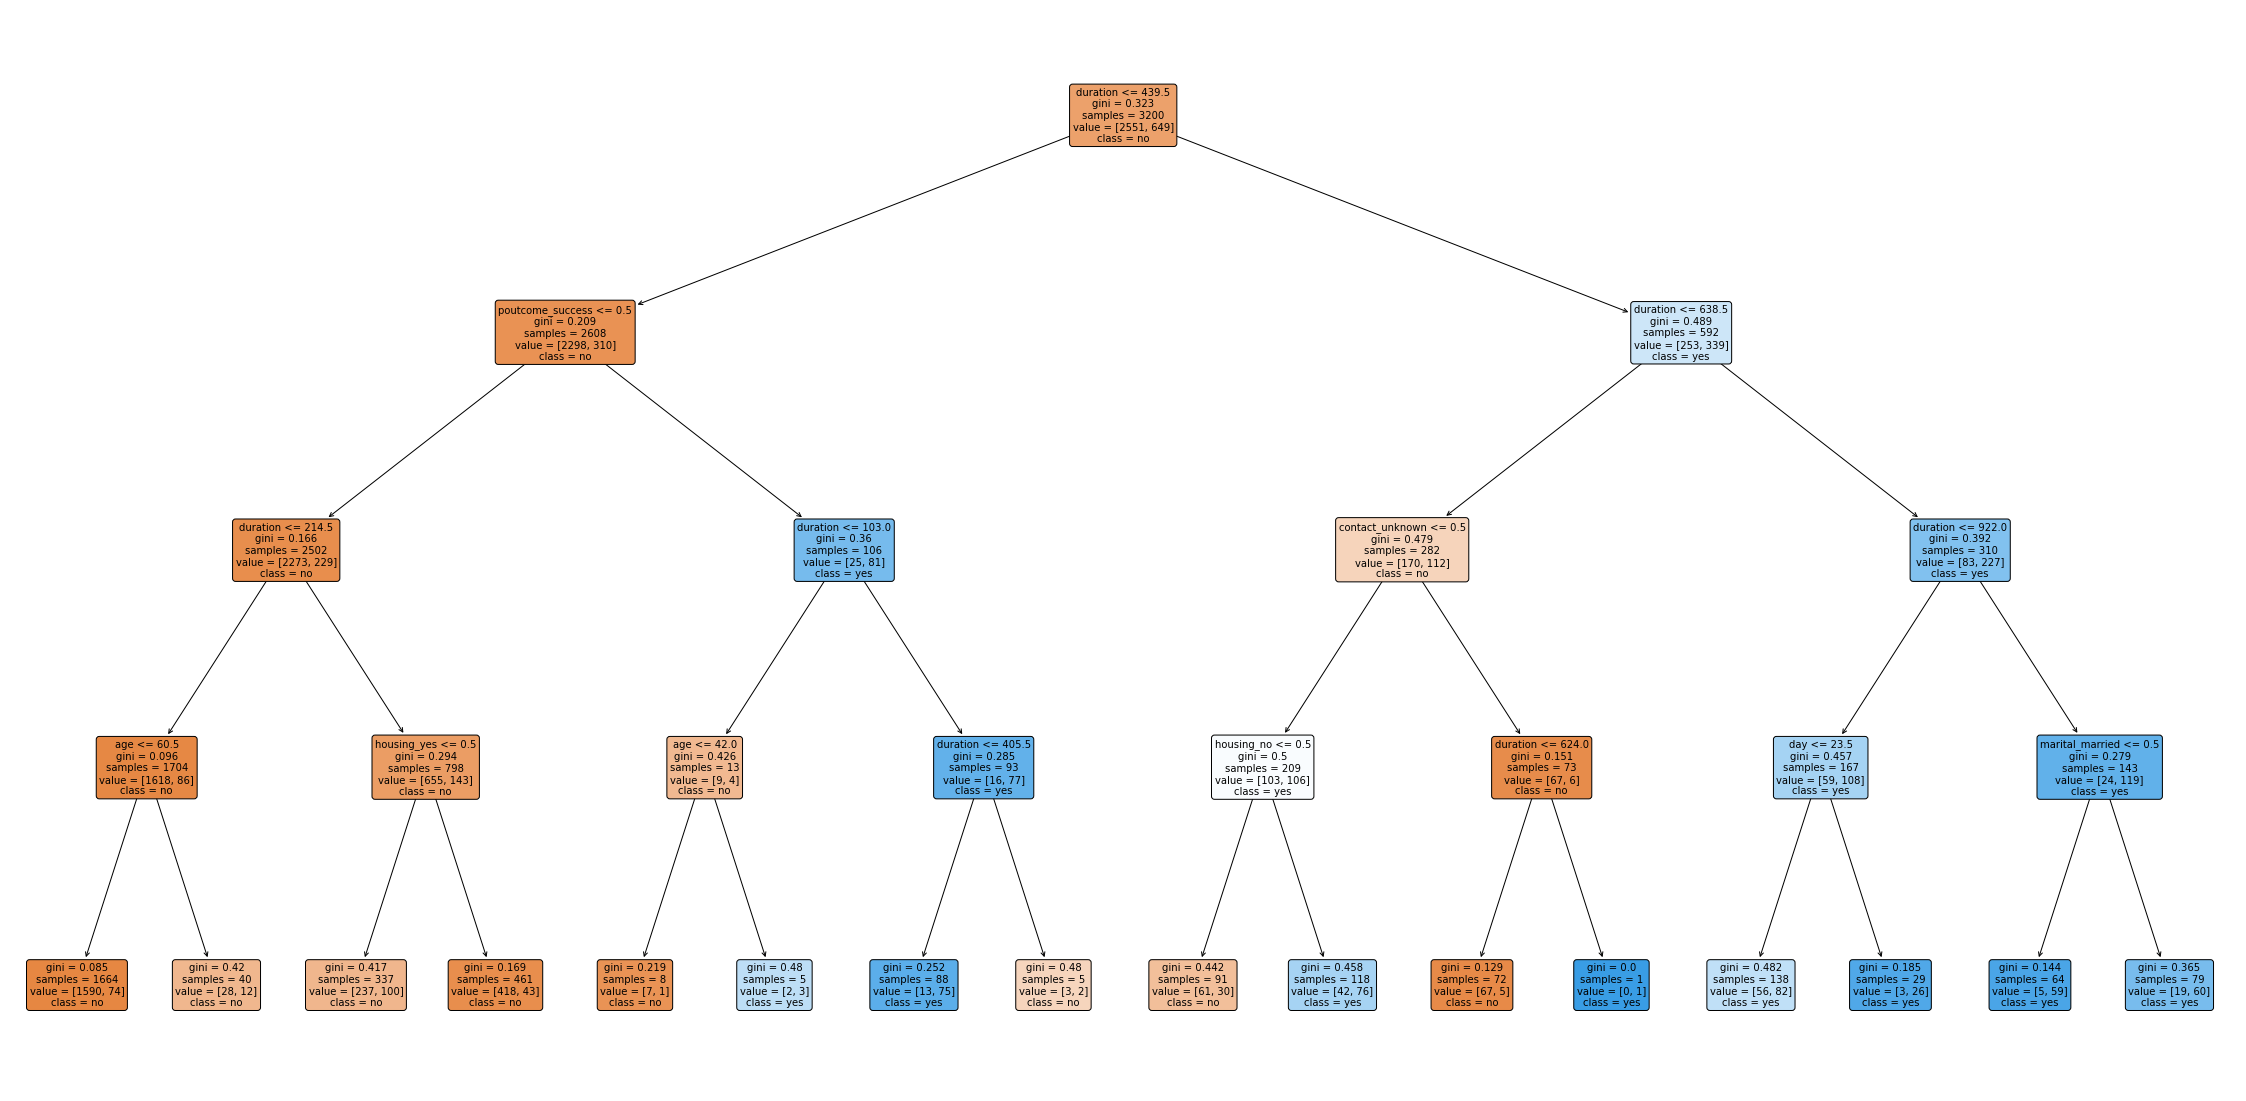

In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree model with max_depth set to 4
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(40, 20))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, rounded=True)
plt.show()


In [10]:
feature_importances = dt_model.feature_importances_

In [11]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                Feature  Importance
3              duration    0.637666
37     poutcome_success    0.221428
34      contact_unknown    0.047029
29          housing_yes    0.038787
28           housing_no    0.024442
0                   age    0.015616
2                   day    0.010543
20      marital_married    0.004487
33    contact_telephone    0.000000
32     contact_cellular    0.000000
21       marital_single    0.000000
30              loan_no    0.000000
35     poutcome_failure    0.000000
36       poutcome_other    0.000000
27          default_yes    0.000000
26           default_no    0.000000
25    education_unknown    0.000000
24   education_tertiary    0.000000
23  education_secondary    0.000000
22    education_primary    0.000000
31             loan_yes    0.000000
19     marital_divorced    0.000000
1               balance    0.000000
10        job_housemaid    0.000000
4              campaign    0.000000
5                 pdays    0.000000
6              previous    0

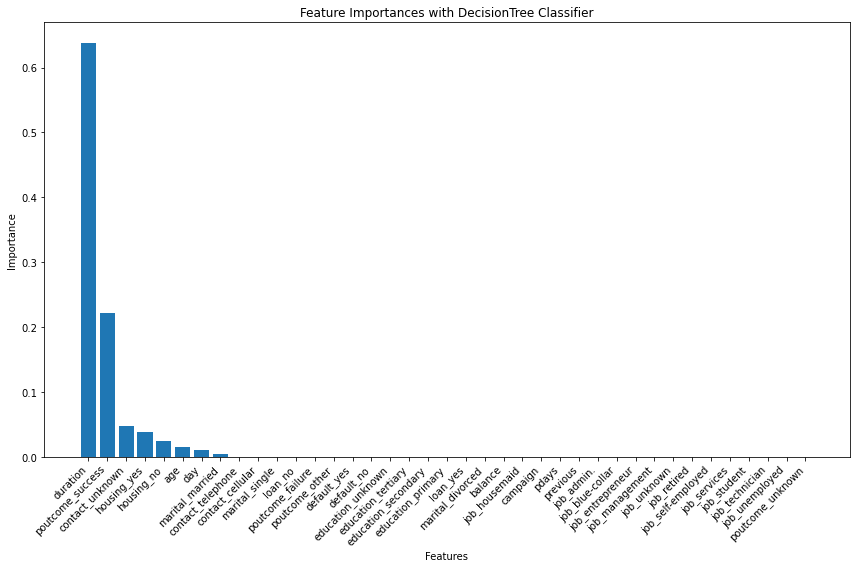

In [19]:
# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances with DecisionTree Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()